<a href="https://colab.research.google.com/github/Alex-Witt/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/module1-scrape-and-process-data/LS_DS_121_Scrape_and_process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2019 talks

In [0]:
import requests
import bs4
url = 'https://us.pycon.org/2019/schedule/talks/list/'
result = requests.get(url)

In [2]:
result

<Response [200]>

In [3]:
type(result)

requests.models.Response

In [0]:
#result.text

In [0]:
soup = bs4.BeautifulSoup(result.text)

In [6]:
type(soup)

bs4.BeautifulSoup

In [7]:
soup.select('h2')

[<h2>
 <a href="/2019/schedule/presentation/235/" id="presentation-235">
         5 Steps to Build Python Native GUI Widgets for BeeWare
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/196/" id="presentation-196">
         8 things that happen at the dot:  Attribute Access &amp; Descriptors
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/210/" id="presentation-210">
         Account Security Patterns: How Logged-In Are you?
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/240/" id="presentation-240">
         Ace Your Technical Interview Using Python
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/161/" id="presentation-161">
         Advanced asyncio: Solving Real-world Production Problems
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/230/" id="presentation-230">
         A Guide to Software Engineering for Visually Impaired
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/157/" id="presentation-

In [8]:
type(soup.select('h2'))

list

In [9]:
len(soup.select('h2'))

95

In [10]:
first = soup.select('h2')[0]
first

<h2>
<a href="/2019/schedule/presentation/235/" id="presentation-235">
        5 Steps to Build Python Native GUI Widgets for BeeWare
      </a>
</h2>

In [11]:
type(first)

bs4.element.Tag

In [12]:
first.text

'\n\n        5 Steps to Build Python Native GUI Widgets for BeeWare\n      \n'

In [13]:
type(first.text)

str

In [14]:
first.text.strip()

'5 Steps to Build Python Native GUI Widgets for BeeWare'

In [15]:
soup.select('h2')[-1]

<h2>
<a href="/2019/schedule/presentation/191/" id="presentation-191">
        Working with Time Zones: Everything You Wish You Didn't Need to Know
      </a>
</h2>

In [16]:
last = soup.select('h2')[-1]
last.text.strip()

"Working with Time Zones: Everything You Wish You Didn't Need to Know"

In [0]:
#This....

titles = []
for tag in soup.select('h2'):
  title = tag.text.strip()
  titles.append(title)

#Is the same as this

titles = [tag.text.strip()
         for tag in soup.select('h2')]

In [18]:
type(titles), len(titles), titles[0], titles[-1]

(list,
 95,
 '5 Steps to Build Python Native GUI Widgets for BeeWare',
 "Working with Time Zones: Everything You Wish You Didn't Need to Know")

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

In [19]:
long_titles = []
for title in titles:
  if len(title) > 80:
    #print(title)
    long_titles.append(title)

long_titles

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 2. List Comprehension

In [20]:
[title for title in titles if len(title)>80]

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 3. Filter with named function

In [21]:
def long(title):
  return len(title) > 80

long('Python is Good!')

False

In [22]:
list(filter(long,titles))

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 4. Filter with anonymous function

In [23]:
list(filter (lambda t: len(t) >80, titles))

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

In [0]:
import pandas as pd
pd.options.display.max_colwidth = 200

In [25]:
df = pd.DataFrame({'title': titles})
print(df.shape)
df.head()

(95, 1)


,title
0,5 Steps to Build Python Native GUI Widgets for BeeWare
1,8 things that happen at the dot: Attribute Access & Descriptors
2,Account Security Patterns: How Logged-In Are you?
3,Ace Your Technical Interview Using Python
4,Advanced asyncio: Solving Real-world Production Problems


In [0]:
#df['title'] Creates Pandas Series
##df['title'].str.len()  Returns an Pandas Series with title length as the column value
###df['title'].str.len()>80 Returns a Boolean on which Index has a title longer than 80 characters
####df[df['title'].str.len()>80] Give me a dataframe where the previous statement was true. 

In [27]:
df[ df['title'].str.len() > 80 ]

,title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders
43,"How to engage Python contributors in the long term? Tech is easy, people are hard."
48,Lessons learned from building a community of Python users among thousands of analysts
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting"
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company."
66,Put down the deep learning: When not to use neural networks and what to do instead
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline


## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

In [28]:
df['title length'] = df['title'].apply(len)
print(df.shape)
df.head()

(95, 2)


,title,title length
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54
1,8 things that happen at the dot: Attribute Access & Descriptors,64
2,Account Security Patterns: How Logged-In Are you?,49
3,Ace Your Technical Interview Using Python,41
4,Advanced asyncio: Solving Real-world Production Problems,56


### title length

In [29]:
df['title length'] = df['title'].apply(len)
print(df.shape)
df.head()

(95, 2)


,title,title length
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54
1,8 things that happen at the dot: Attribute Access & Descriptors,64
2,Account Security Patterns: How Logged-In Are you?,49
3,Ace Your Technical Interview Using Python,41
4,Advanced asyncio: Solving Real-world Production Problems,56


In [30]:
df.loc[df['title length']>80, 'title length']

30    89
38    81
43    82
48    85
50    82
60    95
66    82
84    90
Name: title length, dtype: int64

### long title

In [31]:
df['long title'] = df['title'].str.len()>80
print(df.shape)
df.head(20)

(95, 3)


,title,title length,long title
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False
2,Account Security Patterns: How Logged-In Are you?,49,False
3,Ace Your Technical Interview Using Python,41,False
4,Advanced asyncio: Solving Real-world Production Problems,56,False
5,A Guide to Software Engineering for Visually Impaired,53,False
6,A Medieval DSL? Parsing Heraldic Blazons with Python!,53,False
7,A New Era in Python Governance,30,False
8,API Evolution the Right Way,27,False
9,A Right Stitch-up: Creating embroidery patterns with Pillow,59,False


In [32]:
df[df['long title']==True]

,title,title length,long title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89,True
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders,81,True
43,"How to engage Python contributors in the long term? Tech is easy, people are hard.",82,True
48,Lessons learned from building a community of Python users among thousands of analysts,85,True
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting",82,True
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.",95,True
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline,90,True


In [33]:
### ~ (Tilda) Operator will flip what ever comes after. In this case, its calling all the times that the Boolean is false.


df[~df['long title']].head()

,title,title length,long title
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False
2,Account Security Patterns: How Logged-In Are you?,49,False
3,Ace Your Technical Interview Using Python,41,False
4,Advanced asyncio: Solving Real-world Production Problems,56,False


### first letter

In [34]:
df['first letter'] = df['title'].str[0]
print(df.shape)
df.head()

(95, 4)


,title,title length,long title,first letter
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8
2,Account Security Patterns: How Logged-In Are you?,49,False,A
3,Ace Your Technical Interview Using Python,41,False,A
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A


In [35]:
df[ df['first letter']=='P']

,title,title length,long title,first letter
61,Plan your next eclipse viewing with Jupyter and geopandas,57,False,P
62,Plugins: Adding Flexibility to Your Apps,40,False,P
63,Plug-n-Stream Player Piano: Signal Processing With Python,57,False,P
64,Practical decorators,20,False,P
65,Programmatic Notebooks with papermill,37,False,P
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True,P
67,"Python on Windows is Okay, Actually",35,False,P
68,Python Security Tools,21,False,P


In [36]:
df['title'].str.startswith('P')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
      ...  
65     True
66     True
67     True
68     True
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83    False
84    False
85    False
86    False
87    False
88    False
89    False
90    False
91    False
92    False
93    False
94    False
Name: title, Length: 95, dtype: bool

### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [37]:
!pip install textstat

In [0]:
import textstat

In [39]:
df['title word count'] = df['title'].apply(textstat.lexicon_count)
print(df.shape)
df.head()

(95, 5)


,title,title length,long title,first letter,title word count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


In [40]:
df[df['title word count']<=3]

,title,title length,long title,first letter,title word count
56,Measuring Model Fairness,24,False,M,3
64,Practical decorators,20,False,P,2
68,Python Security Tools,21,False,P,3


## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [41]:
df = df.rename(columns = {'title length': 'title character count'})
df.head()

,title,title character count,long title,first letter,title word count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [42]:
df.describe()

,title character count,title word count
count,95.000000,95.000000
mean,51.347368,7.978947
std,17.729509,3.218890
min,20.000000,2.000000
25%,37.000000,6.000000
50%,52.000000,7.000000
75%,62.000000,9.500000
max,95.000000,19.000000


In [43]:
df.describe(include = 'all')

,title,title character count,long title,first letter,title word count
count,95,95.000000,95,95,95.000000
unique,95,NaN,2,22,NaN
top,Wily Python: Writing simpler and more maintainable Python,NaN,False,T,NaN
freq,1,NaN,87,12,NaN
mean,NaN,51.347368,NaN,NaN,7.978947
std,NaN,17.729509,NaN,NaN,3.218890
min,NaN,20.000000,NaN,NaN,2.000000
25%,NaN,37.000000,NaN,NaN,6.000000
50%,NaN,52.000000,NaN,NaN,7.000000
75%,NaN,62.000000,NaN,NaN,9.500000


In [44]:
df.describe(exclude = 'number')

,title,long title,first letter
count,95,95,95
unique,95,2,22
top,Wily Python: Writing simpler and more maintainable Python,False,T
freq,1,87,12


### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

In [45]:
df.sort_values(by='title character count').head()['title']

64        Practical decorators
68       Python Security Tools
89     Type hinting (and mypy)
82     The Zen of Python Teams
56    Measuring Model Fairness
Name: title, dtype: object

Titles sorted reverse alphabetically

In [46]:
df.sort_values(by='title character count').tail()['title']

66                 Put down the deep learning: When not to use neural networks and what to do instead
48              Lessons learned from building a community of Python users among thousands of analysts
30          ¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
84         Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline
60    One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.
Name: title, dtype: object

In [47]:
df.sort_values(by='first letter', ascending=False).head()

,title,title character count,long title,first letter,title word count
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89,True,¡,12
88,to GIL or not to GIL: the Future of Multi-Core (C)Python,56,False,t,11
94,Working with Time Zones: Everything You Wish You Didn't Need to Know,68,False,W,12
93,Wily Python: Writing simpler and more maintainable Python,57,False,W,8
92,What's new in Python 3.7,24,False,W,5


### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

In [48]:
df['title word count'].value_counts()

6     18
7     13
9     11
8     10
5      9
4      7
10     6
12     5
13     4
15     3
11     3
3      2
19     1
16     1
14     1
2      1
Name: title word count, dtype: int64

Percentage of talks with long titles

In [49]:
df['long title'].value_counts()

False    87
True      8
Name: long title, dtype: int64

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

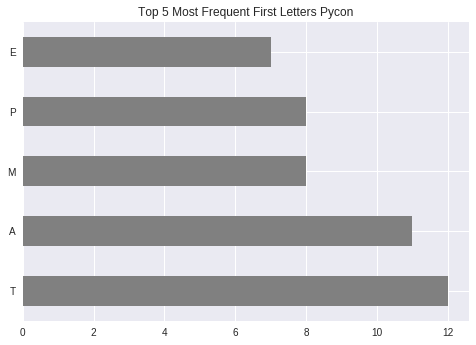

In [50]:
(df['first letter']
 .value_counts()
 .head()
 .plot.barh(color = 'grey', title = "Top 5 Most Frequent First Letters Pycon"));
 

Histogram of title lengths, in characters

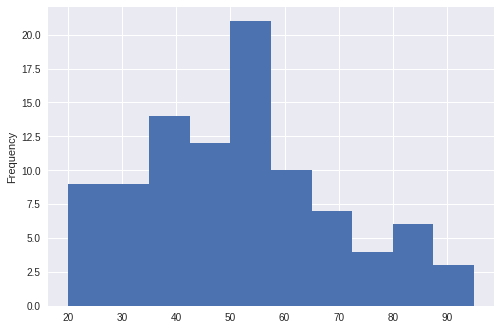

In [51]:
title = 'Distribution of Title Length in Characters'
df['title character count'].plot.hist()

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** the question: Which descriptions could fit in a tweet?


In [52]:
first = soup.select('.presentation-description')[0]
first

<div class="presentation-description">Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start?

BeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper.

This talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps.</div>

In [53]:
first.text

"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start?\r\n\r\nBeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper.\r\n\r\nThis talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps."

In [54]:
type(first)

bs4.element.Tag

In [0]:
description = []

for tag in soup.select('.presentation-description'):
  d = tag.text.strip()
  description.append(d)

In [56]:
type(description), len(description), description[0], description [-1]

(list,
 95,
 "Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start?\r\n\r\nBeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper.\r\n\r\nThis talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps.",
 "Time zones are complicated, but they are a fact of engineering life. Time zones have [skipped entire days](http://www.bbc.com/news/world-asia-16351377) and repeated others. There are time zones that switch t

In [57]:
df ['description'] = description
print(df.shape)
df.head()

(95, 6)


,title,title character count,long title,first letter,title word count,description
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe..."
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ..."
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa..."
3,Ace Your Technical Interview Using Python,41,False,A,6,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat..."


In [58]:
df['description character count'] = df['description'].apply(len)
df['description word count'] = df['description'].apply(textstat.lexicon_count)
print(df.shape)
df.head()

(95, 8)


,title,title character count,long title,first letter,title word count,description,description character count,description word count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",766,135
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296,56
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",426,66
3,Ace Your Technical Interview Using Python,41,False,A,6,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,507,84
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat...",647,96


In [59]:
df.describe()

,title character count,title word count,description character count,description word count
count,95.000000,95.000000,95.000000,95.000000
mean,51.347368,7.978947,813.073684,130.821053
std,17.729509,3.218890,415.988191,64.357872
min,20.000000,2.000000,121.000000,20.000000
25%,37.000000,6.000000,542.500000,85.500000
50%,52.000000,7.000000,718.000000,116.000000
75%,62.000000,9.500000,1016.500000,165.000000
max,95.000000,19.000000,2827.000000,421.000000


In [60]:
# if you insist

df.describe(include = 'all')

,title,title character count,long title,first letter,title word count,description,description character count,description word count
count,95,95.000000,95,95,95.000000,95,95.000000,95.000000
unique,95,NaN,2,22,NaN,95,NaN,NaN
top,Wily Python: Writing simpler and more maintainable Python,NaN,False,T,NaN,"At Dropbox, we’ve always used Python to power our application for Windows, macOS and Linux (until recently, Python 2.7). Over the years, a growing lack of features and the need for outdated compil...",NaN,NaN
freq,1,NaN,87,12,NaN,1,NaN,NaN
mean,NaN,51.347368,NaN,NaN,7.978947,NaN,813.073684,130.821053
std,NaN,17.729509,NaN,NaN,3.218890,NaN,415.988191,64.357872
min,NaN,20.000000,NaN,NaN,2.000000,NaN,121.000000,20.000000
25%,NaN,37.000000,NaN,NaN,6.000000,NaN,542.500000,85.500000
50%,NaN,52.000000,NaN,NaN,7.000000,NaN,718.000000,116.000000
75%,NaN,62.000000,NaN,NaN,9.500000,NaN,1016.500000,165.000000


In [61]:
#the presentation with the smallest word count

print(df.sort_values(by='description word count').head(1)['title'])

54    Making Music with Python, SuperCollider and FoxDot
Name: title, dtype: object


In [62]:
#Proof

df.iloc[54]

title                                                                                                 Making Music with Python, SuperCollider and FoxDot
title character count                                                                                                                                 50
long title                                                                                                                                         False
first letter                                                                                                                                           M
title word count                                                                                                                                       7
description                    Learn how to make music with Python, SuperCollider and FoxDot. We'll create a song together in this live coded adventure.
description character count                                                       

In [63]:
#the presentation with the largest word count. 
print(df.sort_values(by='description word count').tail(1)['title'])

17    Building reproducible Python applications for secured environments
Name: title, dtype: object


In [64]:
#Proof

df.iloc[17]

title                                                                                                                                                               Building reproducible Python applications for secured environments
title character count                                                                                                                                                                                                               66
long title                                                                                                                                                                                                                       False
first letter                                                                                                                                                                                                                         B
title word count                                                            

In [65]:
df[df['description character count']<=280]

,title,title character count,long title,first letter,title word count,description,description character count,description word count
54,"Making Music with Python, SuperCollider and FoxDot",50,False,M,7,"Learn how to make music with Python, SuperCollider and FoxDot. We'll create a song together in this live coded adventure.",121,20


# Stretch Challenge

**Make** another new column in the dataframe:
- description grade level (you can use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Answer** the question: What's the distribution of grade levels? Plot a histogram.

**Be aware** that [Textstat has issues when sentences aren't separated by spaces](https://github.com/shivam5992/textstat/issues/77#issuecomment-453734048). (A Lambda School Data Science student helped identify this issue, and emailed with the developer.) 

Also, [BeautifulSoup doesn't separate paragraph tags with spaces](https://bugs.launchpad.net/beautifulsoup/+bug/1768330).

So, you may get some inaccurate or surprising grade level estimates here. Don't worry, that's ok — but optionally, can you do anything to try improving the grade level estimates?

## Stretch Solution:

The challenge lie in how BeautifulSoup has trouble separating paragraph tags. Instead of spaces or any other seperator, it keeps the html. \r\n and \r\n1 were rampant. This gave the Flesch Kincaid Grade function problems as the extra spaces artifically inflated the evaluation. To combat this, I replaced the html with spaces, then using a join(split()) function combination reduced any double space to a single space. That brought the FKG evaluation more in line.

In [66]:
textstat.flesch_kincaid_grade(first.text.strip())


14.1

In [67]:
#I'm wet code. Please help
df['description'] = df['description'].str.replace('\r\n',' ')
df['description'] = df['description'].str.replace('\r\n1',' ')
df.head()

,title,title character count,long title,first letter,title word count,description,description character count,description word count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",766,135
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296,56
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",426,66
3,Ace Your Technical Interview Using Python,41,False,A,6,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,507,84
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did. By building a simplified chaos monkey service, we will walk through how to create a go...",647,96


In [0]:
spacing = []
for i in df['description']:
  z = " ".join(i.split())
  spacing.append(z)
df['description'] = pd.DataFrame({"Description":spacing})

In [69]:
df['description fkg'] = df['description'].apply(textstat.flesch_kincaid_grade)
print(df.shape)
df.head()

(95, 9)


,title,title character count,long title,first letter,title word count,description,description character count,description word count,description fkg
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",766,135,9.7
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296,56,10.7
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",426,66,8.5
3,Ace Your Technical Interview Using Python,41,False,A,6,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,507,84,11.8
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did. By building a simplified chaos monkey service, we will walk through how to create a goo...",647,96,9.5


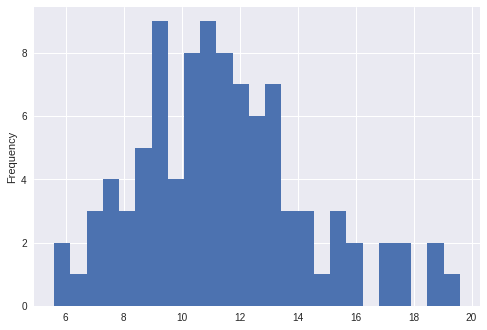

In [70]:
title = "Flesch Kincaid Grades of Presentation Descriptions: PyCon 2019"
df['description fkg'].plot.hist(bins = 25);

In [71]:
#I'm a proof of concept for reference

"""s = df['description']
m = " ".join(s[29].split())
textstat.flesch_kincaid_grade(m)"""

's = df[\'description\']\nm = " ".join(s[29].split())\ntextstat.flesch_kincaid_grade(m)'

In [72]:
#I'm here to prove that there is nothing off with the Dataset

oddity = df [df['description fkg'] >20]
oddity['description']

Series([], Name: description, dtype: object)

In [73]:
#I'm the hardest description to read apparently. 

print(df.sort_values(by='description fkg').tail(1)['title'])
df.iloc[46]


46    Instant serverless APIs, powered by SQLite
Name: title, dtype: object


title                                                                                                                                                                                       Instant serverless APIs, powered by SQLite
title character count                                                                                                                                                                                                               42
long title                                                                                                                                                                                                                       False
first letter                                                                                                                                                                                                                         I
title word count                                                            

In [0]:
#Legacy for some wet code problems
#cleanup_dict = {'\r\n1':' ','\r\n':' '}
#s.str.replace(cleanup_dict)